In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Ss3_Physics.csv")
df.head()

,Name,1st CA,2nd CA,3rd CA,CA comb.,Exams,Total
0,B.Goodluck,8,10,20,38,33,71
1,Success,10,6,20,36,48,84
2,Fuhad,10,10,20,40,58,98
3,Oyinlola,7,10,20,37,35,72
4,Williams,6,9,20,35,37,72


In [3]:
# I mean I did create the csv file and it is clean but let's look at it all shall we
nan_locations = df.isna().any()
nan_locations

Name        False
1st CA      False
2nd CA      False
3rd CA      False
CA comb.    False
Exams       False
Total       False
dtype: bool

In [4]:
# dropping the name column as it is inconsequential
df.drop('Name', axis=1, inplace=True)

In [5]:
# let's get to modelling and drop target(s)/set features
X = df.drop(columns=['Total'])
y = df["Total"]

In [6]:
# splitting training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# fitting the model
# can you believe it? I actually forgot to drop a column that would make the model messy and was inconsequential to the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# model training
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [9]:
# and some metrics to look at
mse = mean_squared_error(y_test, y_test_pred)
r2_score = r2_score(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2_score}")

Mean Squared Error: 1.3463226115771934e-28
R² Score: 1.0


In [10]:
print(df['Total'])

0     71
1     84
2     98
3     72
4     72
5     72
6     67
7     84
8     78
9     76
10    72
11    78
Name: Total, dtype: int64


In [11]:
predict = model.predict(X)
print(predict)

[71. 84. 98. 72. 72. 72. 67. 84. 78. 76. 72. 78.]


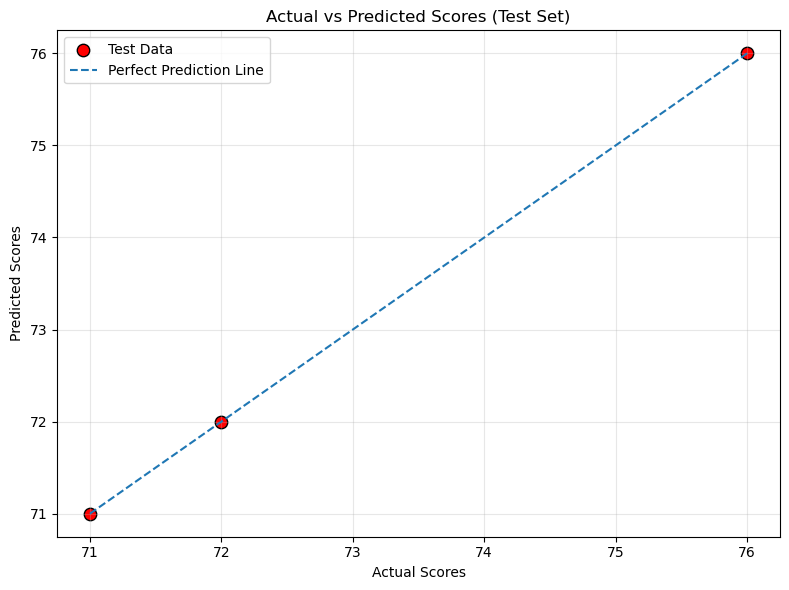

In [12]:
plt.figure(figsize=(8,6))

# Scatter points for test data
plt.scatter(y_test, y_test_pred, color='red', s=80, edgecolors='black', label='Test Data')

# Perfect prediction line
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, '--', label='Perfect Prediction Line')

plt.title("Actual vs Predicted Scores (Test Set)")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [13]:
df

,1st CA,2nd CA,3rd CA,CA comb.,Exams,Total
0,8,10,20,38,33,71
1,10,6,20,36,48,84
2,10,10,20,40,58,98
3,7,10,20,37,35,72
4,6,9,20,35,37,72
5,6,6,15,27,45,72
6,6,6,15,27,40,67
7,6,8,20,34,50,84
8,7,9,20,36,42,78
9,6,6,15,27,49,76


In [14]:
df_ss2 = pd.read_excel("ss2_Physics.xlsx")
df_ss2

,Name,1st CA,2nd CA,3rd CA,CA comb.,Exams,Total
0,A. Tomiwa,6,7,18,31,16,47
1,Precious,6,6,18,30,20,50
2,A.Anthony,6,6,18,30,40,70
3,C. Fortune,7,10,20,37,51,88
4,Todimu,6,7,19,32,49,81
5,Khalid,8,7,19,34,45,79
6,Shindara,8,7,20,35,37,72


In [46]:
print(df_ss2.columns.tolist())
print(df.columns.tolist())

['1st CA', '2nd CA', '3rd CA', 'CA comb.', 'Exams', 'Total']
['1st CA', '2nd CA', '3rd CA', 'CA comb.', 'Exams', 'Total']


In [32]:
df_ss2.drop('Name', axis=1, inplace=True)

In [34]:
df_ss2

,1st CA,2nd CA,3rd CA,CA comb.,Exams,Total
0,6,7,18,31,16,47
1,6,6,18,30,20,50
2,6,6,18,30,40,70
3,7,10,20,37,51,88
4,6,7,19,32,49,81
5,8,7,19,34,45,79
6,8,7,20,35,37,72


In [44]:
# if you pay attention to the numbering of the cells, you'd notice i re ran one above...i will be normalizing columns
df.columns = df.columns.str.strip()
df_ss2.columns = df_ss2.columns.str.strip()

In [52]:
X_df_ss2 = df_ss2[['1st CA', '2nd CA', '3rd CA', 'CA comb.', 'Exams']]
y_df_ss2 = model.predict(X_df_ss2)

In [54]:
df_ss2['Predicted Total'] = y_df_ss2

In [56]:
df_ss2[['Total', 'Predicted Total']]
print(df_ss2[['Total', 'Predicted Total']])

   Total  Predicted Total
0     47             47.0
1     50             50.0
2     70             70.0
3     88             88.0
4     81             81.0
5     79             79.0
6     72             72.0


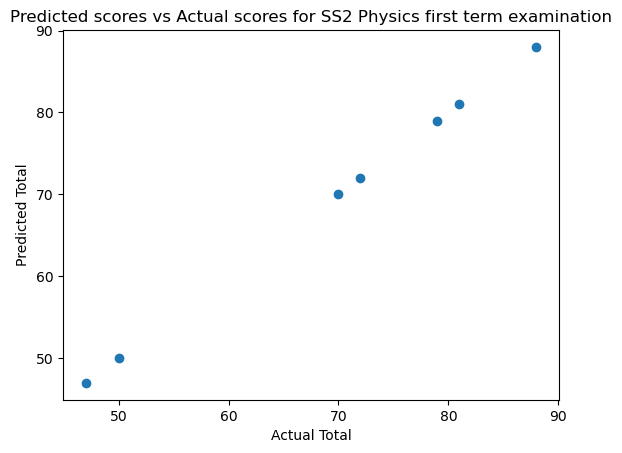

In [58]:
plt.scatter(df_ss2['Total'], df_ss2['Predicted Total'])
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.title ('Predicted scores vs Actual scores for SS2 Physics first term examination')
plt.show();

In [60]:
# exporting to excel as a csv file
df_ss2.to_csv('predicted_dataset.csv', index=False)

In [68]:
# a really perfect prediction, I will try it on a new dataset...without the target feature present at all
df_ss1 = pd.read_csv("ss1_physics_scores.csv")
# I will drop the names early too so the model application can be seamless
df_ss1.drop('Names', axis=1, inplace=True)
df_ss1

,S/N,1st CA,2nd CA,3rd CA,CA Comb.,Exams
0,1,7,9,20,36,52
1,2,6,9,20,35,43
2,3,7,8,20,35,33
3,4,8,7,20,35,50
4,5,6,5,19,31,36
5,6,8,9,20,31,40
6,7,10,9,20,39,53
7,8,8,9,20,37,50
8,9,10,9,20,39,27
9,10,8,9,20,31,39


In [70]:
# forgot to drop S/N, definitely will do that now
df_ss1.drop('S/N', axis=1, inplace=True)
df_ss1

,1st CA,2nd CA,3rd CA,CA Comb.,Exams
0,7,9,20,36,52
1,6,9,20,35,43
2,7,8,20,35,33
3,8,7,20,35,50
4,6,5,19,31,36
5,8,9,20,31,40
6,10,9,20,39,53
7,8,9,20,37,50
8,10,9,20,39,27
9,8,9,20,31,39


In [98]:
print(df.columns.tolist())
print(df_ss1.columns.tolist())

['1st CA', '2nd CA', '3rd CA', 'CA comb.', 'Exams', 'Total']
['1st CA', '2nd CA', '3rd CA', 'CA Comb.', 'Exams', 'Total']


In [78]:
# wait a minute, there is a missing feature, which will cause problems when trying to apply the model as it wasn't present in the initial fit
# I will do something called append to add it in
df_ss1['Total'] = None
print(df_ss1)

    1st CA  2nd CA  3rd  CA  CA Comb.  Exams Total
0        7       9       20        36     52  None
1        6       9       20        35     43  None
2        7       8       20        35     33  None
3        8       7       20        35     50  None
4        6       5       19        31     36  None
5        8       9       20        31     40  None
6       10       9       20        39     53  None
7        8       9       20        37     50  None
8       10       9       20        39     27  None
9        8       9       20        31     39  None
10       7       8       17        32     36  None
11       6       8       17        31     35  None
12       9       9       17        33     33  None


In [94]:
# slight hidden spaces that will need to be normalized, but more of full normalization as i am dealing with spaces that are not just trailing, but in the middle 
df.columns = (
    df.columns
      .str.strip()                   
      .str.replace(r"\s+", " ", regex=True)   # collapse multiple spaces into ONE
)

df_ss1.columns = (
    df_ss1.columns
      .str.strip()
      .str.replace(r"\s+", " ", regex=True)
)


In [100]:
# I will also have to rename a column to make sure they all match
df_ss1 = df_ss1.rename(columns={"CA Comb.": "CA comb."})

In [104]:
X_pred_ss1 = df_ss1[['1st CA', '2nd CA', '3rd CA', 'CA comb.', 'Exams']]
y_pred_ss1 = model.predict(X_pred_ss1)

In [106]:
df_ss1['Predicted Total'] = y_pred_ss1

In [108]:
df_ss1[['Total', 'Predicted Total']]
print(df_ss1[['Total', 'Predicted Total']])

   Total  Predicted Total
0   None            88.00
1   None            78.00
2   None            68.00
3   None            85.00
4   None            66.75
5   None            72.50
6   None            92.00
7   None            87.00
8   None            66.00
9   None            71.50
10  None            68.00
11  None            66.00
12  None            66.50


In [110]:
df_ss1

,1st CA,2nd CA,3rd CA,CA comb.,Exams,Total,Predicted Total
0,7,9,20,36,52,None,88.00
1,6,9,20,35,43,None,78.00
2,7,8,20,35,33,None,68.00
3,8,7,20,35,50,None,85.00
4,6,5,19,31,36,None,66.75
5,8,9,20,31,40,None,72.50
6,10,9,20,39,53,None,92.00
7,8,9,20,37,50,None,87.00
8,10,9,20,39,27,None,66.00
9,8,9,20,31,39,None,71.50
